# RULA  Analysis

In [ ]:
#file_path = 'AAHF21-RW-NO-VR-TRIAL-3-MOTIVE.csv'
#file_path = 'ATSF08-RW-WITH-VR-TRIAL-1-MOTIVE.csv'
file_path = 'MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv'
data = pd.read_csv(file_path,on_bad_lines='skip',sep=',',header=[1,2,3,4,5])
data.columns = data.columns.droplevel(2)
data.columns = ['_'.join(map(str, col)).strip() for col in data.columns.values]
data.rename(columns={'Type_Name_Unnamed: 1_level_3_Time (Seconds)':'Time'},inplace=True)
data.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_3_Frame':'Frame'},inplace=True)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import pandas as pd

# Define the base path for the data
base_path = r"E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data"

# Define the controllers and modalities
controllers = ["WBC", "CHIRON"]
modalities = ["WITH-VR", "NO-VR"]

# Display options for the user to choose
print("Available Controllers:", controllers)
selected_controller = input("Enter the controller (WBC or CHIRON): ")

if selected_controller not in controllers:
    print("Invalid controller selected. Exiting.")
    exit()

print("Available Start Modalities:", modalities)
selected_modality = input("Enter the modality (WITH-VR or NO-VR): ")

if selected_modality not in modalities:
    print("Invalid modality selected. Exiting.")
    exit()

# Path for the selected controller and modality
controller_path = os.path.join(base_path, selected_controller)
modality_path = os.path.join(controller_path, selected_modality)

# List participants
participants = [
    p for p in os.listdir(modality_path)
    if os.path.isdir(os.path.join(modality_path, p))
]
if not participants:
    print(f"No participants found for {selected_modality} in {selected_controller}. Exiting.")
    exit()

print("Available Participants:", participants)
selected_participant = input(f"Enter the participant code from {participants}: ")

# Path to the CSVS folder
participant_csvs_path = os.path.join(modality_path, selected_participant, "CSVS")

# Look for MOTIVE CSV files directly in the CSVS folder
motive_files = [
    f for f in os.listdir(participant_csvs_path)
    if f.endswith("-MOTIVE.csv")
]
if not motive_files:
    print(f"No MOTIVE CSV files found for participant {selected_participant}. Exiting.")
    exit()

print(f"Available MOTIVE files for {selected_participant}:", motive_files)
selected_motive_file = input(f"Enter the MOTIVE file name from {motive_files}: ")

# Full path to the selected MOTIVE CSV file
file_path = os.path.join(participant_csvs_path, selected_motive_file)

# Full path to the MOTIVE CSV file
print(f"MOTIVE CSV file found: {file_path}")

data = pd.read_csv(file_path,on_bad_lines='skip',sep=',',header=[1,2,3,4,5])
data.columns = data.columns.droplevel(2)
data.columns = ['_'.join(map(str, col)).strip() for col in data.columns.values]
data.rename(columns={'Type_Name_Unnamed: 1_level_3_Time (Seconds)':'Time'},inplace=True)
data.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_3_Frame':'Frame'},inplace=True)


Available Controllers: ['WBC', 'CHIRON']


Enter the controller (WBC or CHIRON):  WBC


Available Start Modalities: ['WITH-VR', 'NO-VR']


Enter the modality (WITH-VR or NO-VR):  WITH-VR


Available Participants: ['DOFS27', 'IICM04', 'LEMT02', 'MGNH15', 'NRKH02']


Enter the participant code from ['DOFS27', 'IICM04', 'LEMT02', 'MGNH15', 'NRKH02']:  MGNH15


Available MOTIVE files for MGNH15: ['MGNH15-RW-NO-VR-TRIAL-1-MOTIVE.csv', 'MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv', 'MGNH15-RW-NO-VR-TRIAL-3-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-1-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-2-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-3-MOTIVE.csv', 'MGNH15-SIM-NO-VR-MOTIVE.csv', 'MGNH15-SIM-WITH-VR-MOTIVE.csv']


Enter the MOTIVE file name from ['MGNH15-RW-NO-VR-TRIAL-1-MOTIVE.csv', 'MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv', 'MGNH15-RW-NO-VR-TRIAL-3-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-1-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-2-MOTIVE.csv', 'MGNH15-RW-WITH-VR-TRIAL-3-MOTIVE.csv', 'MGNH15-SIM-NO-VR-MOTIVE.csv', 'MGNH15-SIM-WITH-VR-MOTIVE.csv']:  MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv


MOTIVE CSV file found: E:\Hydra\sophia_ws\SerifosUpload\USER_STUDY\data\WBC\WITH-VR\MGNH15\CSVS\MGNH15-RW-NO-VR-TRIAL-2-MOTIVE.csv


In [5]:
import numpy as np
# Utility function to calculate angles
def calculate_angle(a, b, c):
    """
    Calculate the angle between three points a, b, and c
    with b as the vertex.
    """
    ab = a - b
    cb = c - b
    dot_product = np.dot(ab, cb)
    magnitude = np.linalg.norm(ab) * np.linalg.norm(cb)
    angle = np.arccos(dot_product / magnitude)  # Angle in radians
    return np.degrees(angle)  # Convert to degrees

# Calculate joint angles
def calculate_joint_angles(row):
    # Upper Arm angle (T10 -> LSHO -> LELB)
    upper_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']])
    )
    
    # Lower Arm angle (LSHO -> LELB -> LWRB)
    lower_arm_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LSHO_Position_X'], row['Marker_Skeleton:LSHO_Position_Y'], row['Marker_Skeleton:LSHO_Position_Z']]),
        np.array([row['Marker_Skeleton:LELB_Position_X'], row['Marker_Skeleton:LELB_Position_Y'], row['Marker_Skeleton:LELB_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']])
    )

    # Wrist angle (LFRM -> LWRB -> LFIN)
    wrist_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LFRM_Position_X'], row['Marker_Skeleton:LFRM_Position_Y'], row['Marker_Skeleton:LFRM_Position_Z']]),
        np.array([row['Marker_Skeleton:LWRB_Position_X'], row['Marker_Skeleton:LWRB_Position_Y'], row['Marker_Skeleton:LWRB_Position_Z']]),
        np.array([row['Marker_Skeleton:LFIN_Position_X'], row['Marker_Skeleton:LFIN_Position_Y'], row['Marker_Skeleton:LFIN_Position_Z']])
    )

    # Neck angle (LBHD -> C7 -> T10)
    neck_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LBHD_Position_X'], row['Marker_Skeleton:LBHD_Position_Y'], row['Marker_Skeleton:LBHD_Position_Z']]),
        np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']]),
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']])
    )
    neck_angle = 180 - neck_angle 

    # Trunk angle (LPSI -> T10 -> C7)
    trunk_angle = calculate_angle(
        np.array([row['Marker_Skeleton:LPSI_Position_X'], row['Marker_Skeleton:LPSI_Position_Y'], row['Marker_Skeleton:LPSI_Position_Z']]),
        np.array([row['Marker_Skeleton:T10_Position_X'], row['Marker_Skeleton:T10_Position_Y'], row['Marker_Skeleton:T10_Position_Z']]),
        np.array([row['Marker_Skeleton:C7_Position_X'], row['Marker_Skeleton:C7_Position_Y'], row['Marker_Skeleton:C7_Position_Z']])
    )

    return pd.Series({
        'Upper_Arm_Angle': upper_arm_angle,
        'Lower_Arm_Angle': lower_arm_angle,
        'Wrist_Angle': wrist_angle,
        'Neck_Angle': neck_angle,
        'Trunk_Angle': trunk_angle
    })

# Apply the function to calculate joint angles
angles_df = data.apply(calculate_joint_angles, axis=1)

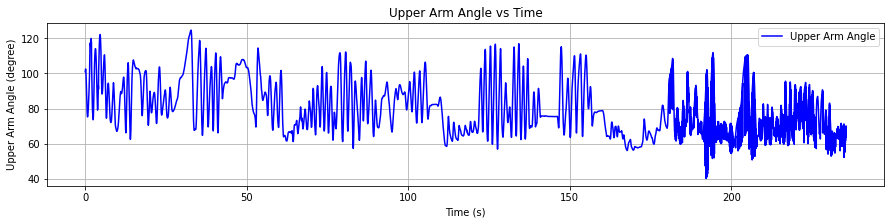

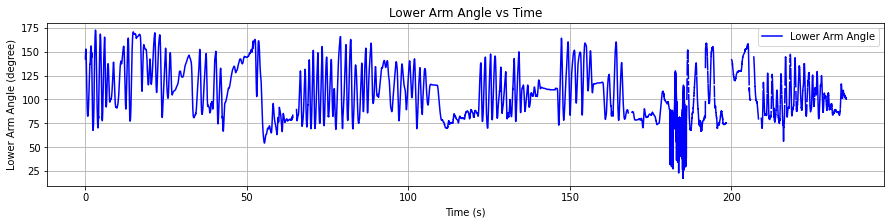

In [7]:
from matplotlib import pyplot as plt

plt.figure(1,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Upper Arm Angle (degree)')
plt.title('Upper Arm Angle vs Time')
plt.legend()
plt.grid(True)
#plt.show()

plt.figure(2,figsize=(15, 3))
plt.plot(data['Time'], angles_df['Lower_Arm_Angle'], linestyle='-', color='b', label='Lower Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Lower Arm Angle (degree)')
plt.title('Lower Arm Angle vs Time')
plt.legend()
plt.grid(True)
plt.show()

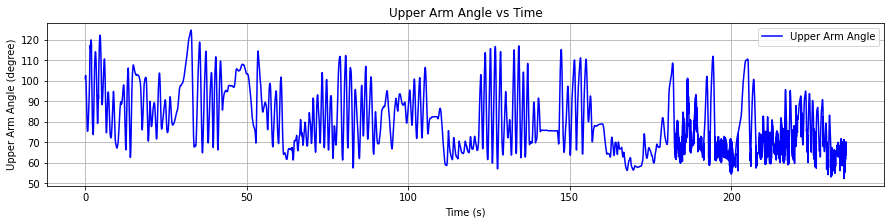

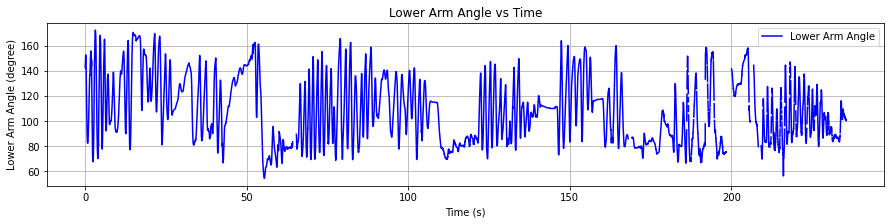

In [8]:
def clean_sudden_changes(dataframe, columns, threshold):
    """
    Removes sudden changes in specified columns of a DataFrame by replacing them
    with the preceding values.

    :param dataframe: pd.DataFrame - The input DataFrame
    :param columns: list - List of column names to clean
    :param threshold: float - The allowed threshold for change
    :return: pd.DataFrame - The modified DataFrame
    """
    # Copy the dataframe to avoid modifying the original
    cleaned_df = dataframe.copy()
    
    # Iterate over the specified columns
    for column in columns:
        # Iterate over the rows for the current column
        for i in range(1, len(cleaned_df)):
            current_value = cleaned_df.loc[i, column]
            previous_value = cleaned_df.loc[i - 1, column]
            
            # Check for sudden change
            if abs(current_value - previous_value) > threshold:
                cleaned_df.loc[i, column] = previous_value
    
    return cleaned_df

# Example usage
columns_to_clean = ['Upper_Arm_Angle', 'Lower_Arm_Angle']  # List of columns to clean
threshold = 20  # Define a threshold for sudden changes
angles_df_filtered = clean_sudden_changes(angles_df, columns_to_clean, threshold)


plt.figure(1,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Upper_Arm_Angle'], linestyle='-', color='b', label='Upper Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Upper Arm Angle (degree)')
plt.title('Upper Arm Angle vs Time')
plt.legend()
plt.grid(True)
#plt.show()

plt.figure(2,figsize=(15, 3))
plt.plot(data['Time'], angles_df_filtered['Lower_Arm_Angle'], linestyle='-', color='b', label='Lower Arm Angle')
plt.xlabel('Time (s)')
plt.ylabel('Lower Arm Angle (degree)')
plt.title('Lower Arm Angle vs Time')
plt.legend()
plt.grid(True)
plt.show()

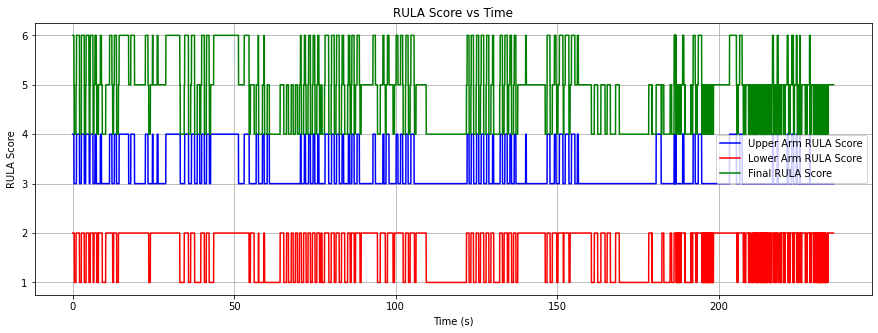

In [9]:
# RULA scoring based on angles (simplified example)
def rula_scoring(row):
    # Scoring based on approximate thresholds from RULA guidelines
    upper_arm_score = 1 if row['Upper_Arm_Angle'] < 20 else (2 if row['Upper_Arm_Angle'] < 45 else 3)
    lower_arm_score = 1 if row['Lower_Arm_Angle'] > 120 else (2 if row['Lower_Arm_Angle'] > 90 else 3)
    wrist_score = 1 if row['Wrist_Angle'] < 15 else 2
    neck_score = 1 if row['Neck_Angle'] < 20 else (2 if row['Neck_Angle'] < 45 else 3)
    trunk_score = 1 if row['Trunk_Angle'] < 20 else (2 if row['Trunk_Angle'] < 45 else 3)

    # Combine scores for the final RULA score (simplified; adapt with official RULA table)
    final_rula_score = upper_arm_score + lower_arm_score + wrist_score + neck_score + trunk_score

    return pd.Series({
        'UpperArm_Score': upper_arm_score,
        'LowerArm_Score': lower_arm_score,
        'Wrist_Score': wrist_score,
        'Neck_Score': neck_score,
        'Trunk_Score': trunk_score,
        'Final_RULA_Score': final_rula_score
    })

def rula_scoring_reduced(row):
    # Scoring based on approximate thresholds from RULA guidelines
    upper_arm_score = 1 if row['Upper_Arm_Angle'] < 20 else (2 if row['Upper_Arm_Angle'] < 45 else (3 if row['Upper_Arm_Angle']<90 else 4))
    if row['Lower_Arm_Angle'] > 65 and row['Lower_Arm_Angle'] <100:
        lower_arm_score = 1
    else:
        lower_arm_score = 2
    

    # Combine scores for the final RULA score (simplified; adapt with official RULA table)
    final_rula_score = upper_arm_score + lower_arm_score 

    return pd.Series({
        'UpperArm_Score': upper_arm_score,
        'LowerArm_Score': lower_arm_score,
        'Final_RULA_Score': final_rula_score
    })

# Apply scoring function
scores_df = angles_df_filtered.apply(rula_scoring_reduced, axis=1)

plt.figure(figsize=(15, 5))
plt.plot(data['Time'], scores_df['UpperArm_Score'], linestyle='-', color='b', label='Upper Arm RULA Score')
plt.plot(data['Time'], scores_df['LowerArm_Score'], linestyle='-', color='r', label='Lower Arm RULA Score')
plt.plot(data['Time'], scores_df['Final_RULA_Score'], linestyle='-', color='g', label='Final RULA Score')
plt.xlabel('Time (s)')
plt.ylabel('RULA Score')
plt.title('RULA Score vs Time')
plt.legend()
plt.grid(True)
plt.show()